Part 1 ‐ Exploratory data analysis

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/Neha1529/Ultimate-Technologies-Inc./master/data/logins.json'
# Read in the data
logins = pd.read_json(url)
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
# Check for data quality: 
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
logins.set_index('login_time', inplace=True)
logins['count'] = 1

In [5]:
# Aggregate login counts based on 15-minute time intervals
rdf = logins.resample('15T', label='right').sum()
rdf.head()

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1


In [6]:
rdf.shape

(9788, 1)

In [7]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [8]:
rdf['count'].isna().sum()

0

In [9]:
# Extract features from the dataset
rdf['time'] = pd.to_datetime(rdf.index)

In [10]:
rdf['month'] = rdf.time.dt.month
rdf['day'] = rdf.time.dt.day
rdf['hour'] = rdf.time.dt.hour
rdf['week'] = rdf.time.dt.week
rdf['weekday'] = rdf.time.dt.weekday
rdf.head()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,7,1970-01-01 21:00:00,1,1,21,1,3
1970-01-01 21:15:00,1,1970-01-01 21:15:00,1,1,21,1,3


Login activities in different months

In [11]:
# Group by month
print ('Grouping by month')
print (rdf.groupby('month')['count'].sum())

Grouping by month
month
1    21225
2    24669
3    33727
4    13521
Name: count, dtype: int64


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

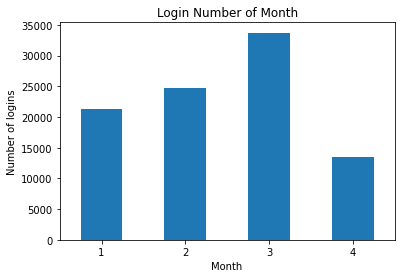

In [12]:
rdf.groupby('month')['count'].sum().plot(kind='bar')
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Login number kept increasing from January to March. The login number of March is highest. Because there are only 13 days data in April, so it is not enough to compare with other months.

Login activities in different weeks

In [13]:
# Group by week
print ('[Grouping by week]')
print (rdf.groupby('week')['count'].sum())

[Grouping by week]
week
1     2368
2     5218
3     5021
4     4750
5     4747
6     5564
7     5914
8     7038
9     6554
10    7400
11    7329
12    8959
13    7284
14    8096
15    6496
16     404
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

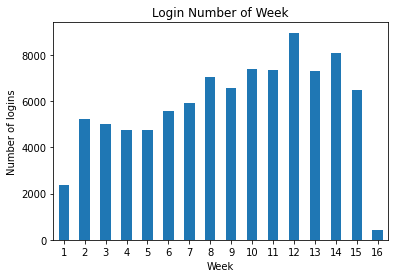

In [14]:
rdf.groupby('week')['count'].sum().plot(kind='bar')
plt.title("Login Number of Week")
plt.xlabel("Week")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Logins in week 12 are the most. It is the last week of March. Logins in week 14 are the second most. It is the second week of April.


Login activities in different weekdays

In [15]:
# Group by weekday
import calendar
nweek = 16   # total weeks 
print ('[Grouping by weekday]')
print (rdf.groupby('weekday')['count'].aggregate(np.sum)/nweek)

[Grouping by weekday]
weekday
0     553.0625
1     576.6250
2     642.6250
3     746.9375
4     947.0000
5    1214.6250
6    1140.5000
Name: count, dtype: float64


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

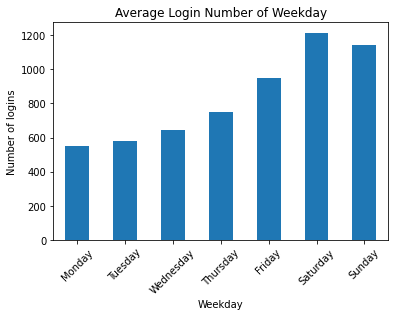

In [16]:
ax = (rdf.groupby('weekday')['count'].sum()/nweek).plot(kind='bar')
plt.title("Average Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

Login number kept increasing from Monday to Saturday. There are more logins in weekends than in weekdays. Logins on Saturday are the most, and logins on Sunday are the second most, while logins on Friday are the third most.

In [17]:
# Aggregate login counts based on 1-day time intervals
df_day = logins.resample('D').sum()
df_day.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [18]:
df_day['date'] = pd.to_datetime(df_day.index)
df_day['weekday'] = df_day.date.dt.weekday
df_day.head()

,count,date,weekday
login_time,,,
1970-01-01,112,1970-01-01,3
1970-01-02,681,1970-01-02,4
1970-01-03,793,1970-01-03,5
1970-01-04,788,1970-01-04,6
1970-01-05,459,1970-01-05,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

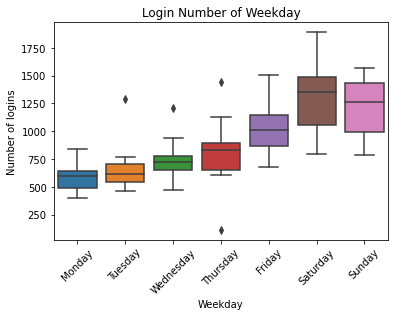

In [19]:
import seaborn as sns

ax = sns.boxplot(x='weekday', y='count', data=df_day)
plt.title("Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

We get relatively same result form the boxplot above. But there are some outliers on Tuesday, Wednesday and Thurday. Login numbers on weekends varied a lot.

Login activities in daily cycle

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

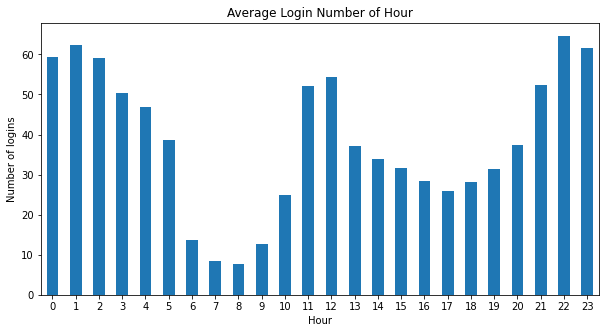

In [20]:
# Group by hour
nday = 30+28+30+13   # total days
(rdf.groupby('hour')['count'].sum()/nday).plot(kind='bar', figsize=(10,5))
plt.title("Average Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Most logins are at night, from 10 PM to 2 AM. Least logins are in the moring. There are more logins at noon than in the afternoon.

In [21]:
# Aggregate login counts based on 1-hour time intervals
df_hour = logins.resample('H').sum()
df_hour.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [22]:
df_hour['time'] = pd.to_datetime(df_hour.index)
df_hour['hour'] = df_hour.time.dt.hour
df_hour.head()

,count,time,hour
login_time,,,
1970-01-01 20:00:00,24,1970-01-01 20:00:00,20
1970-01-01 21:00:00,9,1970-01-01 21:00:00,21
1970-01-01 22:00:00,21,1970-01-01 22:00:00,22
1970-01-01 23:00:00,58,1970-01-01 23:00:00,23
1970-01-02 00:00:00,53,1970-01-02 00:00:00,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

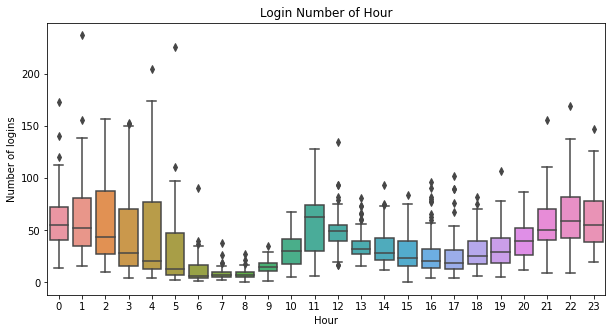

In [23]:
sns.mpl.rc("figure", figsize=(10,5))
sns.boxplot(x='hour', y='count', data=df_hour)
plt.title("Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

From this boxplot, we can see same trend as in above bar chart. But we find many outliers in this plot. And time of 2~4 AM is of varying range higher than other time.


**Result:**


1. Login counts kept increasing from January to March and reached the peak in March.
2. In a week's step, login counts rised and droped a little. Logins in week 12 are the most. It is the last week of March. Logins in week 14 are the second most. It is the second week of April.
3. Login number kept increasing from Monday to Saturday. There are more logins in weekends than in weekdays. Logins on Saturday are the most, and logins on Sunday are the second most, while logins on Friday are the third most. Login numbers on weekends varied most.
4. Most logins are at night, from 10 PM to 2 AM. Least logins are in the moring. There are more logins at noon than in the afternoon. Login counts varied most from 2 AM to 4 AM






**Part 2 ‑ Experiment and metrics design** 

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the observation
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

**Solution:**
1. I will choose the toll costs driver partners in two cities reimbursed and the percentage of the reimbursed costs by total toll costs incharged as the key measure of success of this experiment. If the toll costs of driver partners reimbursed increase, it indicates that more driver partners went to another city. If the percentage of the reimbursed costs by total toll costs incharged increase, it shows that more activities between two cities are taken by driver partners. The bigger the costs reimbursed and percentage are, the more success this experiment is.
2. I will implement the experiment by collecting the data of the toll costs reimbursed, include date, time, cost, direction, driver parterns from which city, toll costs incharged. Then we will aggregate and anlalyze the data to find out the trend. If the costs reimbursed and percentage are increasing,
- I will conduct significance tests to verify the significance of the observation.
-I will visulize the experiment result of the trend, weekday, time of a day, direction, percentagae, ect. Then prepare a presentation to provide recommendations to the city operations team.


In [24]:
user_url = 'https://raw.githubusercontent.com/Neha1529/Ultimate-Technologies-Inc./master/data/ultimate_data_challenge.json'
# Read in the data

df = pd.read_json(user_url)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [25]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [27]:
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [28]:
# Fill in missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df.dropna(axis=0, inplace=True)

In [29]:
df.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [30]:
df = df.reset_index(drop=True)

In [31]:
# Convert dates to datetime format
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

Exploratory Data Analysis

In [32]:
# Create box plots of all categorical, non-date data
categorical_features = ['city', 'phone', 'ultimate_black_user']

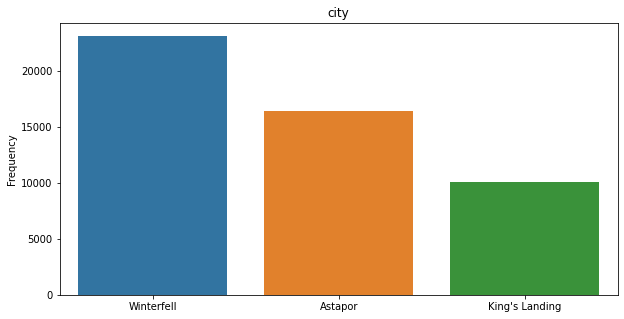

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64


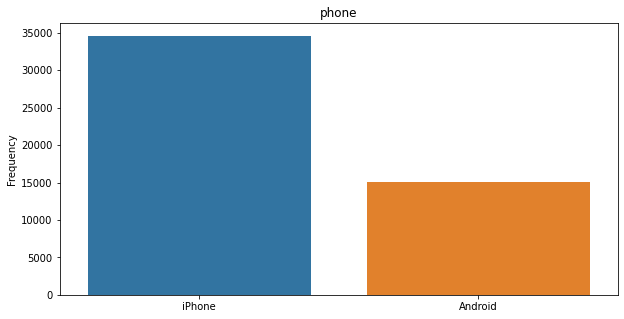

iPhone     34582
Android    15022
Name: phone, dtype: int64


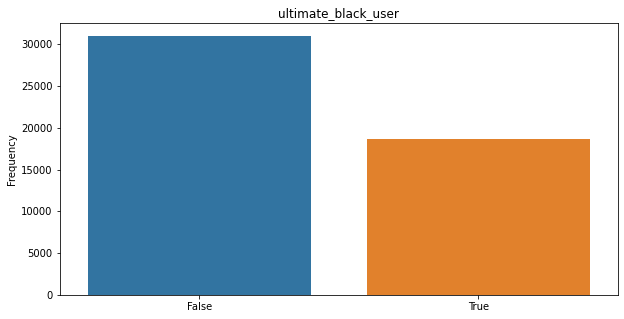

False    30992
True     18612
Name: ultimate_black_user, dtype: int64


In [33]:
for feature in categorical_features:
    sns.barplot(x = list(df[feature].value_counts().index), y = df[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(df[feature].value_counts())

In [34]:
# Show distributions of numerical features
numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

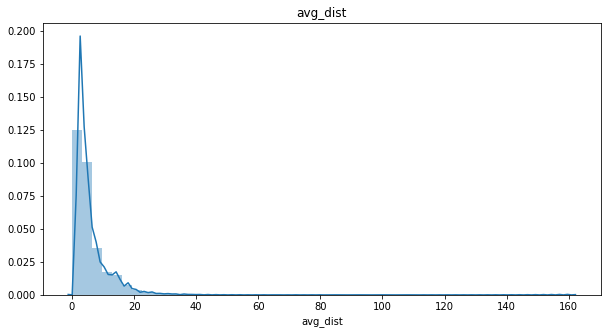

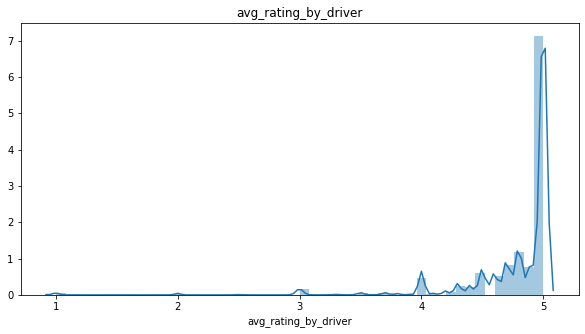

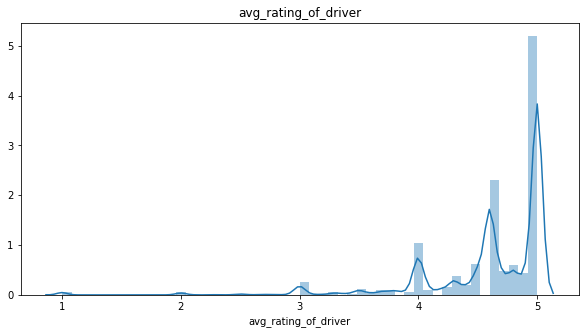

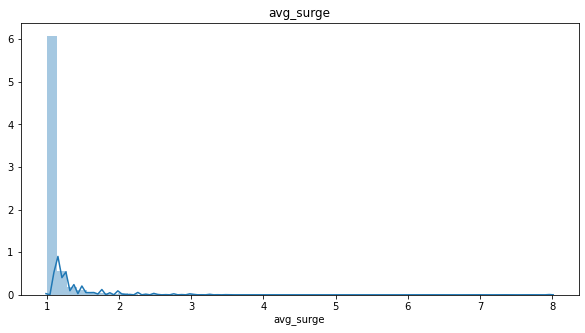

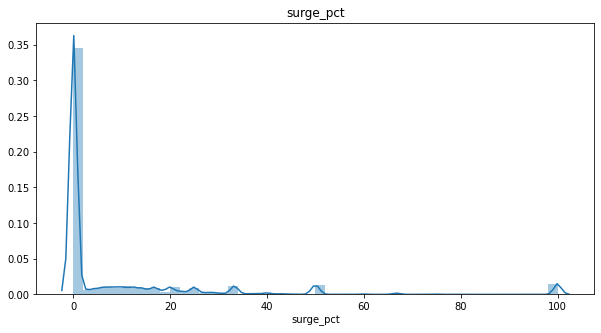

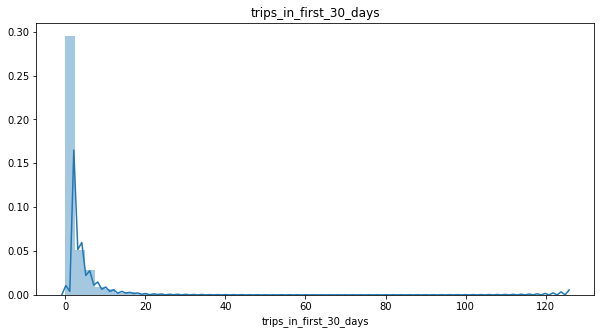

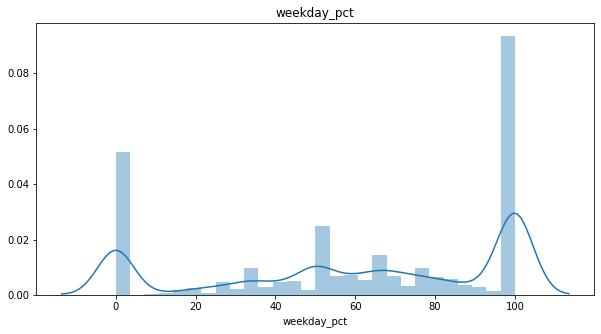

In [35]:
for feature in numerical_features:
    sns.distplot(df[feature])
    plt.title(feature)
    plt.show();

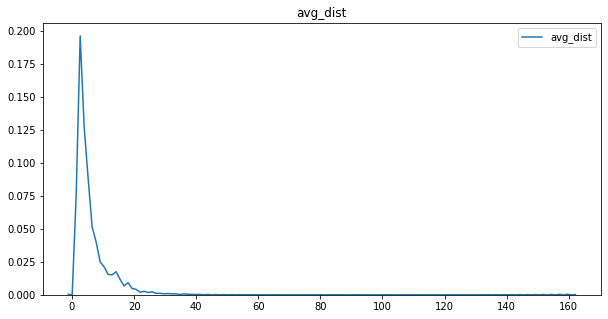

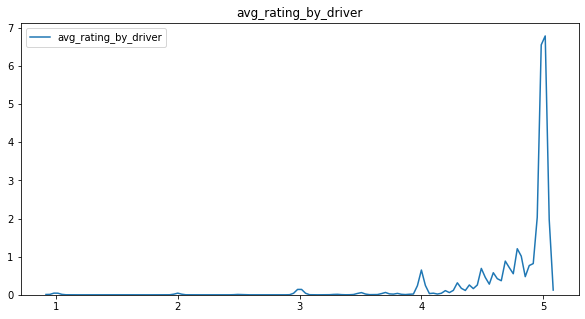

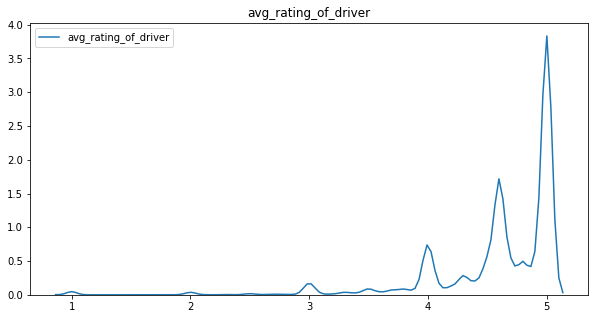

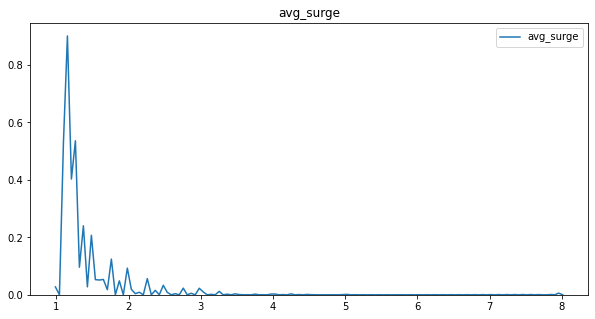

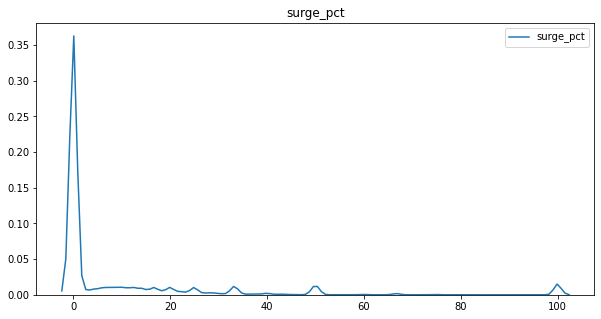

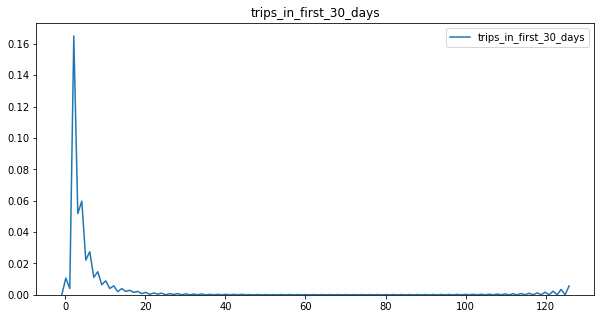

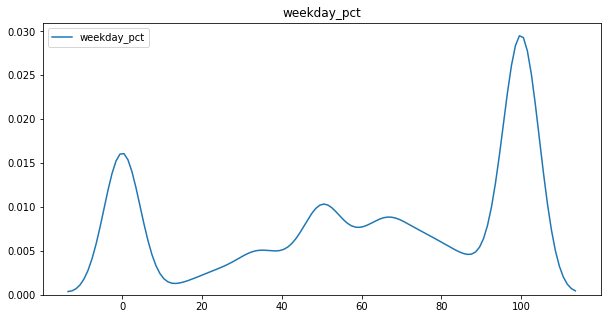

In [36]:
for feature in numerical_features:
    sns.kdeplot(df[feature])
    plt.title(feature)
    plt.show();

**What fraction of the observed users were retained?**

In [37]:
df.sort_values(by='last_trip_date').tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
45166,King's Landing,2,2014-01-25,4.4,1.14,2014-07-01,Android,17.9,False,83.9,2.32,4.8
12053,King's Landing,16,2014-01-18,4.9,1.02,2014-07-01,Android,3.9,False,74.0,2.64,4.8
18667,Astapor,3,2014-01-10,4.7,1.02,2014-07-01,iPhone,3.2,False,67.7,6.22,4.8
11999,Winterfell,1,2014-01-24,4.7,1.04,2014-07-01,iPhone,15.4,True,38.5,6.80,4.9
31351,Winterfell,12,2014-01-19,4.9,1.07,2014-07-01,iPhone,6.0,True,70.0,5.63,4.7


In [38]:
df['last_trip_date'].sort_values().tail()

45166   2014-07-01
12053   2014-07-01
18667   2014-07-01
11999   2014-07-01
31351   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

So the latest 'last_trip_date' is 2014-07-01. As we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days, We consider a user retained if his 'last_trip_date' is after 2014-06-01.

In [39]:
frac = len(df[df['last_trip_date'] > '2014-06-01'])/len(df)
print('{:.2f}% of the observed users were retained.'.format(frac*100))

36.65% of the observed users were retained.


**Data Modeling**

In [40]:
# Create the target variable -- retained

df['retained'] = (df['last_trip_date'] > '2014-06-01')*1
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  retained                49604 non-null  int64 

In [42]:
# Drop datetime features
df.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)



In [43]:
# Creating dummy variables for categorical features
num_fea = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [44]:
num_fea.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,0,0


num_fea is the final dataset we will use for modeling in next step.

Split data into training and test sets

In [45]:
X = num_fea.drop('retained', axis=1)
y = num_fea['retained']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39683, 11)
(9921, 11)
(39683,)
(9921,)


Machine Learning Model

We will use Random Forest Classifier here. Random forests algorithm is among the most popular machine learning methods because of its relatively good accuracy, robustness and ease of use. It is also often used for feature selection.
Advantages of using random forest algorithm compared with other classification algorithms:

- The overfitting problem will never come when we use the random forest algorithm in any classification problem.
- The random forest algorithm can be used for feature engineering.
- Which means identifying the most important features out of the available features from the training dataset.



In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [48]:
clf = RandomForestClassifier()

In [50]:
cv_scores = cross_val_score(clf, X_train.values, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.76918231 0.75985889 0.77119819 0.76272681 0.76020665]
Average 5-Fold CV Score: 0.7646345705800112


So, using Random Forest Claasifier with default parameters, we can get a model with 75.73% accuracy.

**Hyperparameter Tuning**

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [52]:
# Define function to get metrics of the model
def get_metrics(true_labels, predicted_labels):
    print ('Accuracy: ', accuracy_score(true_labels,predicted_labels))
    print (classification_report(true_labels, predicted_labels))

In [58]:
# Create the hyperparameter grid
n_options = [10,20,50]
feature_options = [5, 8, 10]
oob_options = [True, False]
param_grid = {'n_estimators': n_options, 'max_features': feature_options , 'oob_score': oob_options}

In [59]:
# Instantiate the GridSearchCV object
clf_cv = GridSearchCV(clf, param_grid, cv=5)
# build model    
clf_cv.fit(X_train, y_train)
# predict using model
y_predict = clf_cv.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

In [60]:
# Print the optimal parameters and best score
print("Tuned Parameter: {}".format(clf_cv.best_params_))
print("Tuned Score: {}".format(clf_cv.best_score_))
print()
# evaluate model prediction performance 
print ('Test set performance:')
get_metrics(true_labels=y_test, predicted_labels=y_predict)

Tuned Parameter: {'max_features': 5, 'n_estimators': 50, 'oob_score': True}
Tuned Score: 0.7654410698210097

Test set performance:
Accuracy:  0.7565769579679468
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      6290
           1       0.67      0.65      0.66      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.73      0.74      9921
weighted avg       0.75      0.76      0.76      9921



**Final Model**

In [61]:
rfc = RandomForestClassifier(n_estimators=100, max_features=8, oob_score=True)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [63]:
# Generate classification report
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      6290
           1       0.68      0.65      0.66      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921

Test set accuracy: 75.91%


In [64]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=range(0,2), columns=range(0,2))

,0,1
0,5161,1129
1,1261,2370


Text(0.5, 1.0, 'ROC Curve')

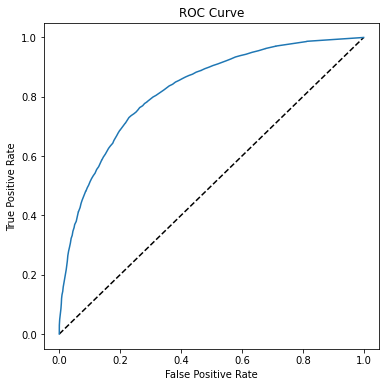

In [65]:
# Compute predicted probabilities
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [66]:
# Compute and print AUC score
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8233


**Feature Selection**

In [67]:
fi = pd.DataFrame(list(zip(X.columns, rfc.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
5,avg_dist,0.297468
6,avg_rating_by_driver,0.150229
4,weekday_pct,0.113739
3,surge_pct,0.083339
1,avg_rating_of_driver,0.080430




From the importance of features, we find that the most important 3 features are:
1. avg_dist: the average distance in miles per trip taken in the first 30 days after signup
2. avg_rating_by_driver: the rider’s average rating over all of their trips
3. weekday_pct: the percent of the user’s trips occurring during a weekday




IV. Suggestions to Ultimate

To improve long-term rider retention, Ultimate need improve in the following aspects:

- Attract riders to take longer trips during the first 30 days after signup.
- Provide better service to get higher ratings from the riders.
- Persuade riders to take trips during weekdays.

